Dans un premier temps, il s'agit de charger les données du Titanic et de garder que les variables d'intérêt pour notre étude.

In [2]:
import pandas as pd 
import seaborn as sns

titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Nettoyage des données

In [3]:
titanic=titanic[['survived','pclass','sex','age']]
titanic.dropna(axis=0,inplace=True)
titanic['sex'].replace(['male','female'],[0,1],inplace=True)
titanic.head()

C:\Users\qevan\AppData\Local\Temp\ipykernel_12220\3299924775.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['sex'].replace(['male','female'],[0,1],inplace=True)
C:\Users\qevan\AppData\Local\Temp\ipykernel_12220\3299924775.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['sex'

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


Création du modèle

In [4]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier() #choix du modèle
y=titanic['survived']
x=titanic.drop('survived',axis=1)

Découpage du jeu de données 

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Validation croisée du modèle

In [6]:
from sklearn.model_selection import GridSearchCV
import numpy as np
param_grid={'n_neighbors':np.arange(1,20),
            'metric':['euclidiean','manhattan']}
grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
grid.fit(x_train,y_train)
grid.best_score_

C:\Users\qevan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
95 fits failed out of a total of 190.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
95 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\qevan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\qevan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-pac

np.float64(0.7618154080854309)

In [7]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': np.int64(7)}

In [8]:
model=grid.best_estimator_ #pour sauvegarder le meilleur modèle 
model.score(x_test,y_test)

0.7692307692307693

Matrice de confusion 

In [11]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,model.predict(x_test))

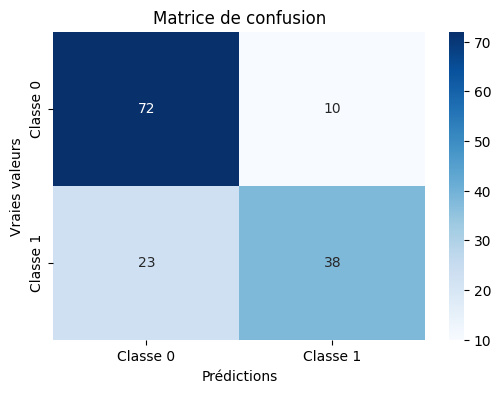

In [12]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de confusion")
plt.show()

Courbe d'apprentissage 

In [13]:
from sklearn.model_selection import learning_curve
N,train_score,val_score =learning_curve(model,x_train,y_train, train_sizes=np.linspace(0.2,1,5),cv=5)
print(N)

[ 91 182 273 364 456]


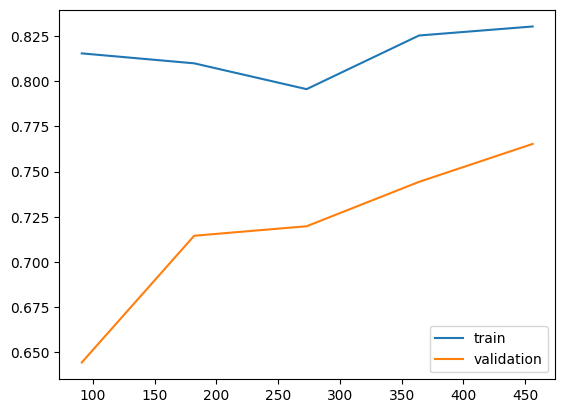

In [14]:
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.legend()